Problem statement - Prepare a classification model using SVM for salary data

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Since number of columns are more, let's use PCA

In [4]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)
df1= df.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                     #Normalised dataset

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  3.40357232e-15, -4.89437886e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -1.15019810e-15, -2.41639925e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02, -8.38996650e-16,  1.44257540e-15],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01,  2.61363595e-16, -2.77122324e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.50766391e-16,  1.12271928e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02, -1.06894721e-16, -1.42364939e-17]])

In [6]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 2.72317545e-33])

In [7]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

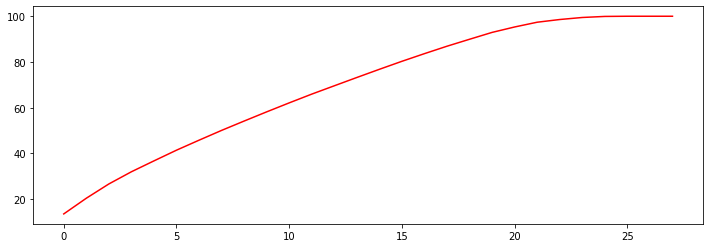

In [8]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

### Selecting first 24 PCAs out of total 28

In [9]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     df[['size_category']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,small
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,small
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,small
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,small
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,large
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,large
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,large
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,small


In [10]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

## Selecting the model validation technique

### Trial 1 : Train Test split approach

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
np.round(result, 4)

0.8462

### Trial 2 : Cross Validation approach

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
num_folds = 10
kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)
print('Result:',np.round(results.mean(),4),'\n','\n','Standard dev:',np.round(results.std(),4))

Result: 0.8664 
 
 Standard dev: 0.1336


### Trial 3 : Leave One Out Cross Validation approach

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=loocv)
print('Result:',np.round(results.mean(),4),'\n','\n','Standard dev:',np.round(results.std(),4))

Result: 0.8723 
 
 Standard dev: 0.3337


#### Though the accuracy of LOOCV is marginally higher than Cross Validation approach, but since it's std is thrice that of Cross Validation approach,<br> Hence, wise decision would be to use Cross Validation approach as our model vaidation technique here, so we'll proceed with that.

## KNN Classification 

### Let's use Grid search CV to find out best value for K

In [16]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,100))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.7369492158327111
{'n_neighbors': 32}


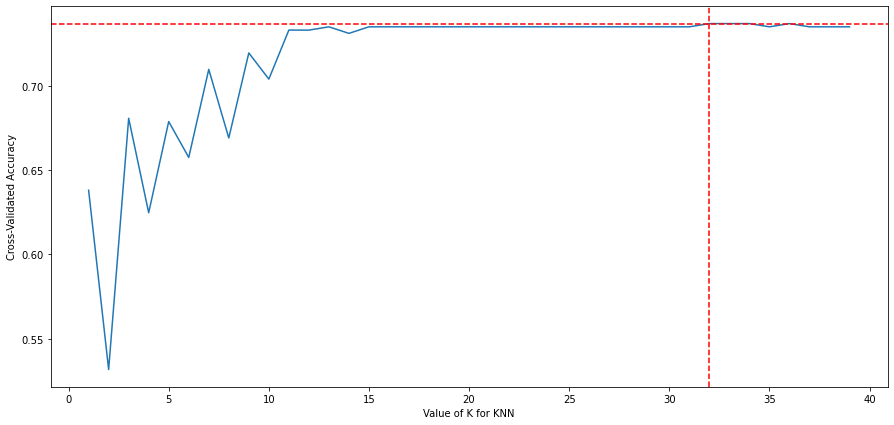

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.7369492158327111, color='r', linestyle='--')
plt.axvline(x=32, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Hence K=32 is the best value, so we'll make the model using that.

In [18]:
#KNN Classification
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=32)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7346530920060331


### SVM Classification

In [19]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

Let's use Grid search CV to find out best value for params

In [20]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 100, 'kernel': 'linear'}, 0.9650075414781296)

In [21]:
#SVM Clasification
clf = SVC(C=100, kernel='linear')
results = cross_val_score(clf, X, Y, cv=kfold)

print(results.mean())

0.9688914027149321


### Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

### Trial-1: Bagging

In [22]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(clf, X, Y, cv=kfold)

print(results.mean())

0.9688914027149321


### Trial-2: Random Forest

In [23]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(clf, X, Y, cv=kfold)

print(results.mean())

0.9688914027149321


### Trial-3: Boosting

In [24]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(clf, X, Y, cv=kfold)

print(results.mean())

0.9688914027149321


### Trial-4: Stacking

In [25]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [26]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.8333710407239818


In [27]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.8160633484162896


In [28]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.8141779788838612


In [29]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.8102941176470587


In [30]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.864441930618401


#### Hence, we can say that SVM/Bagging/Random Forest- any of them is the equally best predicting model for this dataset